In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib tk

In [2]:
import torch
import torch.nn as nn

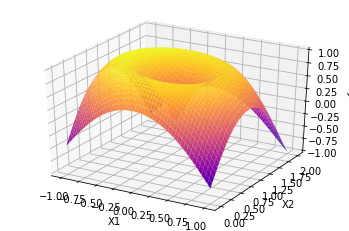

In [181]:
num_points = 50
# X1 = np.linspace(-2.5, 1.9, num_points)
X1 = np.linspace(-2.5, 2.5, num_points)
X2 = np.linspace(-2.5, 3, num_points)
# X2 = np.linspace(-2.2, 2.1, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1. - 0.1*(X1)+0.02*(X2)

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1
X1,X2 = 1*X1, X2*1+1
# Y = -Y

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = torch.Tensor(np.c_[x1, x2])

yy = torch.Tensor(Y.reshape(-1,1))
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [338]:
vector = torch.Tensor([[0, 1]])
vector /= torch.norm(vector)

In [339]:
## Simple dot product
yout = xx@vector.t()
yout.shape

torch.Size([2500, 1])

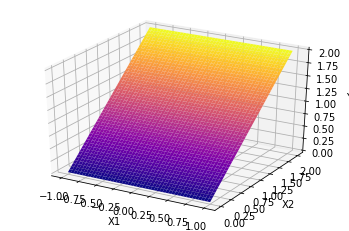

In [340]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, yout.data.numpy().reshape(X1.shape), cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [341]:
## modified dot product
### decrease magnitude if projection mag > 1

yout = xx@vector.t()
mask = yout > 1
yout[mask] = 2-yout[mask]

In [342]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, yout.data.numpy().reshape(X1.shape), cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()
plt.pause(5)

TclError: can't invoke "update" command: application has been destroyed

In [343]:
## modified dot product
### previous + decrease magnitude difference

mags = torch.norm(xx, p=2, dim=1).pow(3)
mags.shape

torch.Size([2500])

In [356]:
yout = xx@vector.t()*2
mask = yout > 1
yout[mask] = 1-(yout[mask]-1)*0.5

# yout -= mags.reshape(yout.shape)*0.5
yout = (1.0)*yout + (-1.0)*mags.reshape(yout.shape)
### plot this seperately

In [353]:
### plot this seperately
mags = torch.norm(xx, p=2, dim=1).pow(3)
yout = (xx)@vector.t()
yout = (1.0)*yout + (-1.0)*mags.reshape(yout.shape)

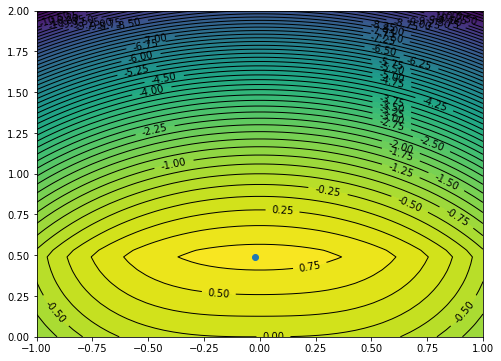

In [357]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.contourf(X1, X2, yout.data.numpy().reshape(Y.shape), levels=50)
cs = plt.contour(X1, X2, yout.data.numpy().reshape(Y.shape), levels=50, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.2f")

xx_max = xx[yout.argmax()]
plt.scatter(*xx_max)

In [355]:
xx[yout.argmax()]

tensor([-0.0204,  0.5714])

In [152]:
%matplotlib tk
fig = plt.figure()[xx_max[0]][xx_max[0]]
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, yout.data.numpy().reshape(X1.shape), cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()
plt.pause(10)

TclError: can't invoke "update" command: application has been destroyed